In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from pathlib import Path
data_dir =Path(r"/content/drive/MyDrive/Tea_project/tea_blister_blight_data")

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NotFoundError: ignored

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))
     

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

NameError: ignored

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.72,ymax=1.011)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

NameError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

NameError: ignored

In [ ]:
resnet_model.save("/content/drive/MyDrive/Tea_project/tea_blister_blight_model")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow import keras
resnet_model = keras.models.load_model('/content/drive/MyDrive/Tea_project/tea_blister_blight_model')


In [ ]:
import cv2
 
ip = "/content/drive/MyDrive/Tea_project/tea_blister_blight_data/healthy/UNADJUSTEDNONRAW_thumb_239.jpg"
image=cv2.imread(ip)
img_height,img_width=224,224
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=resnet_model.predict(image)
class_names = ['healthy' ,"tea_blister_blight"]
output_class=class_names[np.argmax(pred)]
output_class

error: ignored

In [ ]:
import os
import random

folder_path_Tomato_Baterial = "/content/drive/MyDrive/Tea_project/tea_blister_blight_data/healthy"
folder_path_Tomato_early_bligt = "/content/drive/MyDrive/Tea_project/tea_blister_blight_data/tea_blister_blight"

num_images = 10

image_paths_tomato_baterial = []
for root, dirs, files in os.walk(folder_path_Tomato_Baterial):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths_tomato_baterial.append(os.path.join(root, filename))
            

tomato_baterial_images = random.sample(image_paths_tomato_baterial, num_images)

# List for Tomato___Early_blight folder
image_paths_tomato_early_blight = []
for root, dirs, files in os.walk(folder_path_Tomato_early_bligt):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths_tomato_early_blight.append(os.path.join(root, filename))

# Randomly select num_images from the list
tomato_early_blight_images = random.sample(image_paths_tomato_early_blight, num_images)

In [ ]:
import cv2


tomato_bacterial_predict = []
tomato_early_blight_predict = []



tomato_bacterial_predict_true = [0 for i in range(len(tomato_baterial_images))]
tomato_early_blight_true = [1 for i in range(len(tomato_early_blight_images))]




y_true = tomato_bacterial_predict_true+ tomato_early_blight_true







for ip in tomato_baterial_images:
  image=cv2.imread(ip)
  img_height,img_width=224,224
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  pred=resnet_model.predict(image)
  class_names = [0, 1]
  output_class=class_names[np.argmax(pred)]
  tomato_bacterial_predict.append(output_class)


for ip in tomato_early_blight_images:
    image = cv2.imread(ip)
    img_height, img_width = 224, 224
    image_resized = cv2.resize(image, (img_height, img_width))
    image = np.expand_dims(image_resized, axis=0)
    pred = resnet_model.predict(image)
    class_names = [0, 1]
    output_class = class_names[np.argmax(pred)]
    tomato_early_blight_predict.append(output_class)


In [ ]:
y_pred = tomato_bacterial_predict + tomato_early_blight_predict

In [ ]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 9  1]
 [ 0 10]]


In [ ]:
cm = np.array(cm)  # Example confusion matrix

# Convert values to percentages
cm_percent = (cm / cm.sum(axis=1)[:, np.newaxis]) * 100

print(cm_percent)

[[ 90.  10.]
 [  0. 100.]]


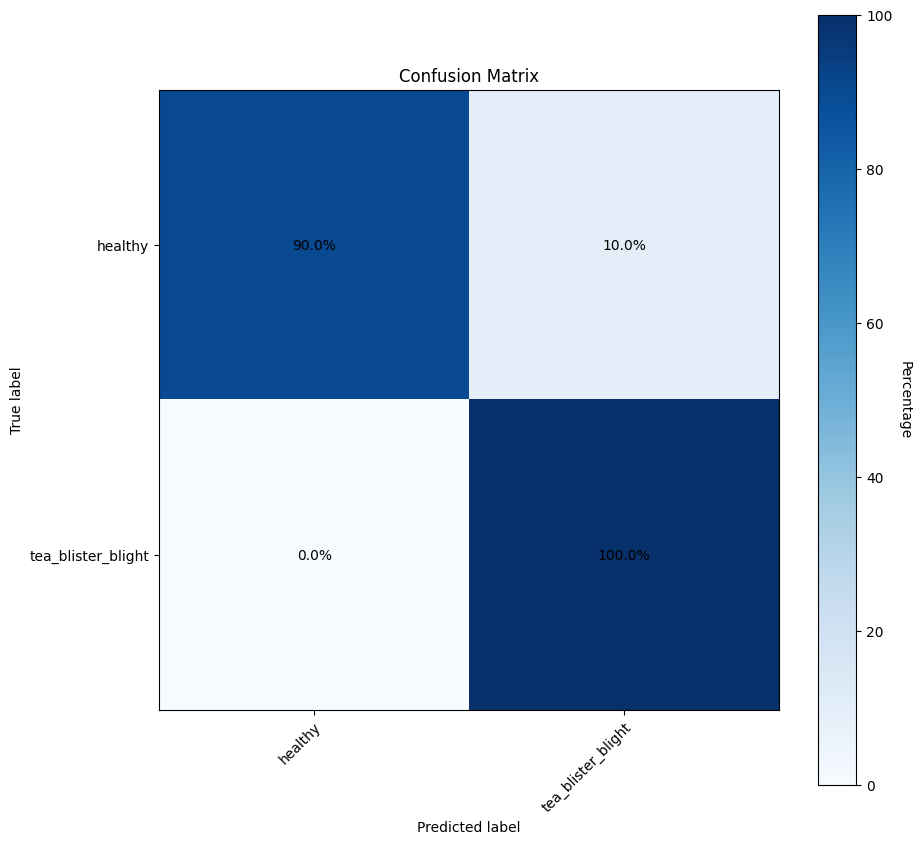

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Define class labels
labels = ['healthy' ,"tea_blister_blight"]

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm_percent, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage', rotation=-90, va='bottom')

# Set tick labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{cm_percent[i, j]:.1f}%', ha='center', va='center', color='black')

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['healthy' ,"tea_blister_blight"]

classification_rep = classification_report(y_true, y_pred, target_names=target_names)
print(classification_rep)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


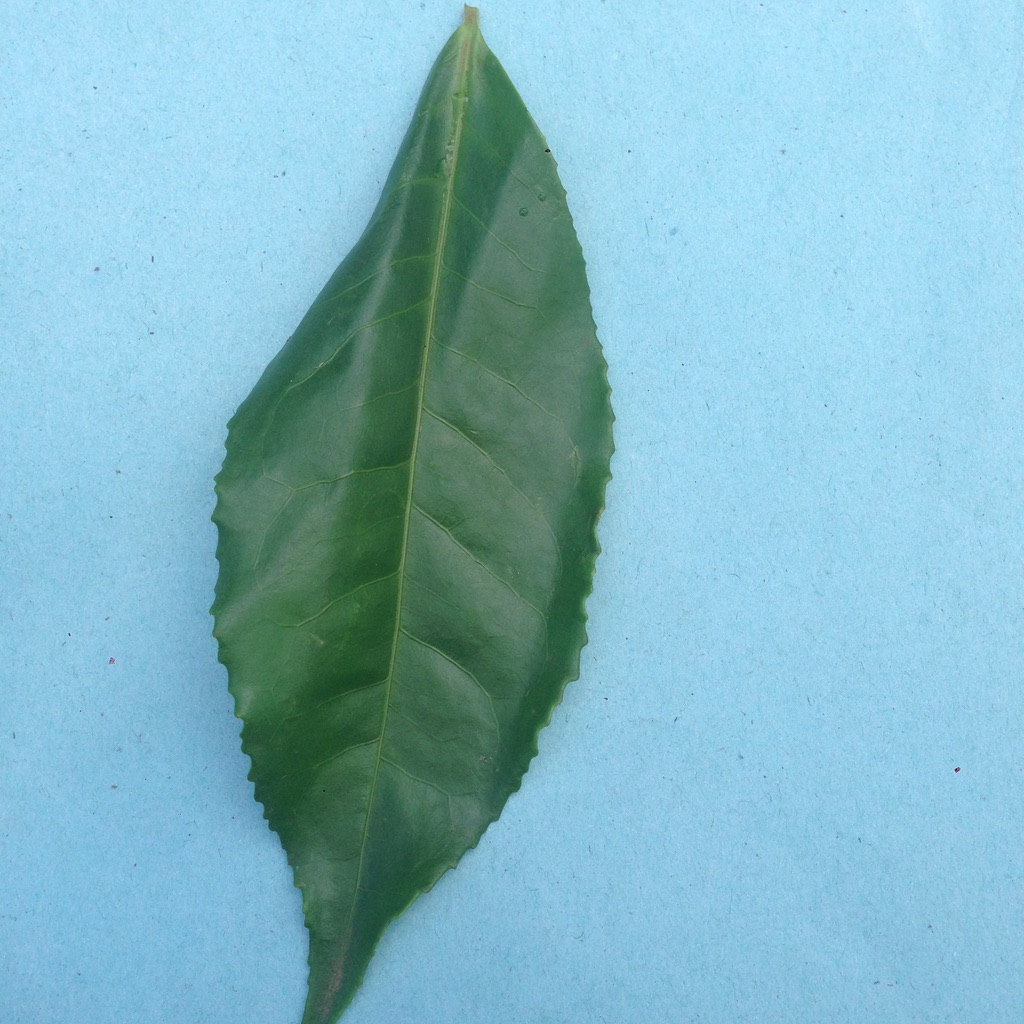

1/1 [==============================] - 1s 1s/step
[[0.93033576 0.06966417]]


'healthy'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2

test_model = keras.models.load_model('/content/drive/MyDrive/Tea_project/tea_blister_blight_model')

ip = "/content/drive/MyDrive/Tea_project/tea_blister_blight_data/healthy/UNADJUSTEDNONRAW_thumb_242.jpg"
image=cv2.imread(ip)
cv2_imshow(image)
img_height,img_width=224,224
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=test_model.predict(image)
print(pred)
class_names = ['healthy' ,"tea_blister_blight" ]
output_class=class_names[np.argmax(pred)]
output_class

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


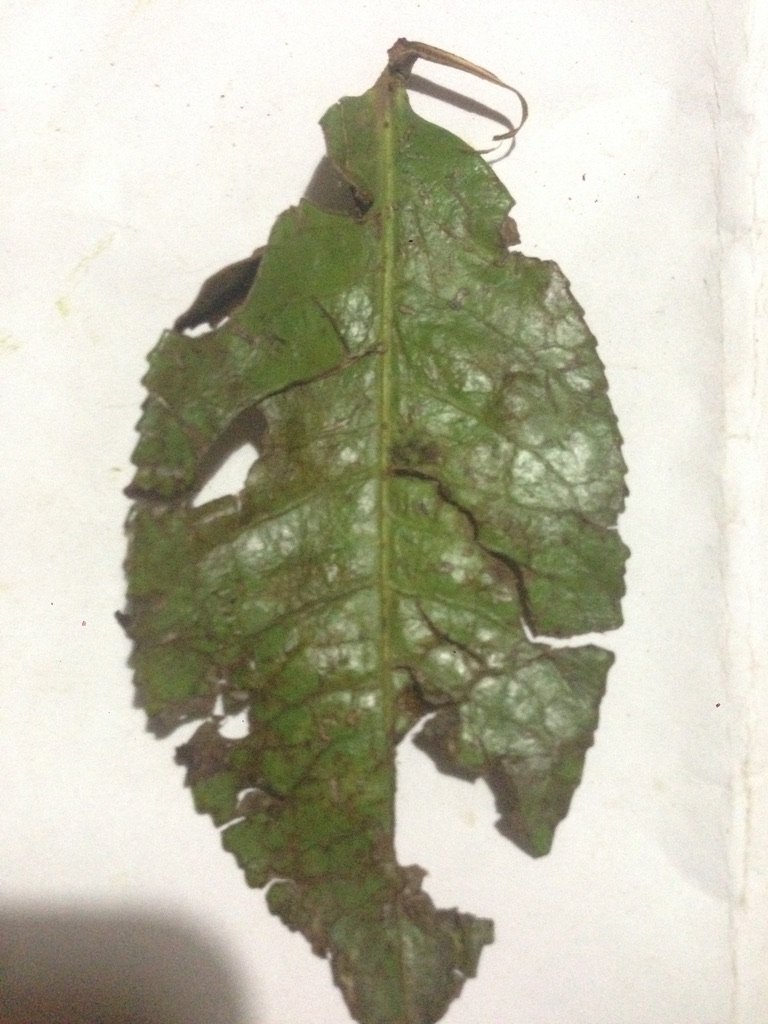

1/1 [==============================] - 1s 1s/step
[[1.8607631e-08 1.0000000e+00]]


'tea_blister_blight'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2

test_model = keras.models.load_model('/content/drive/MyDrive/Tea_project/tea_blister_blight_model')

ip = "/content/drive/MyDrive/Tea_project/tea_blister_blight_data/tea_blister_blight/UNADJUSTEDNONRAW_thumb_191.jpg"
image=cv2.imread(ip)
cv2_imshow(image)
img_height,img_width=224,224
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=test_model.predict(image)
print(pred)
class_names = ['healthy' ,"tea_blister_blight" ]
output_class=class_names[np.argmax(pred)]
output_class